In [335]:
import numpy as np
import matplotlib.pyplot as plt

In [336]:
import os
import shutil
import time

# Plot Space average of u(t)

In [337]:
dt = 0.01
tspan = 10
tspan/dt

1000.0

In [338]:
dx = 0.1
L = 100

Text(0.5, 1.0, '2D\nC = 1')

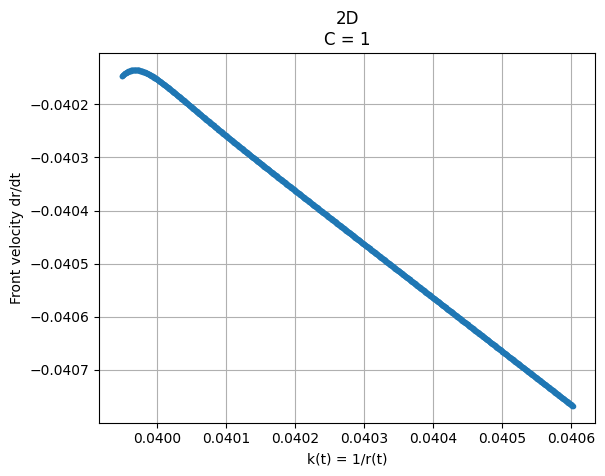

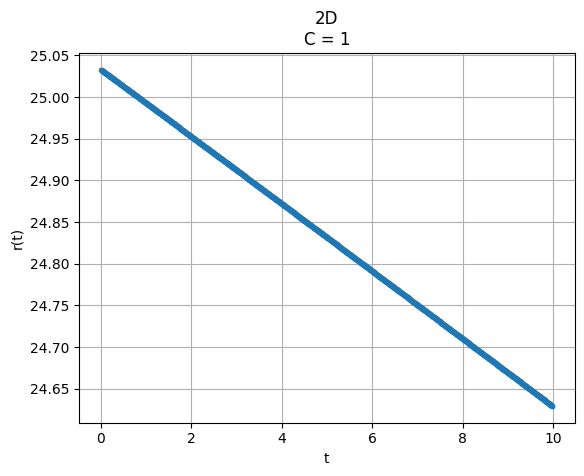

In [339]:
f = open("../fileAveout.dat", "r")
N = int(round(tspan/dt))
tt = np.zeros(N)
ave = np.zeros(N)

i = 0
for row in f:
    a, b = row.split(" ")
    tt[i] = float(a)
    ave[i] = float(b)
    i = i + 1

area = (ave+np.ones(N))*L**2/2
k = np.zeros(len(area))
r = np.zeros(len(area))
drdt = np.zeros(len(area)-1)
r[0] = np.sqrt(area[0]/np.pi)
k[0] = 1/r[0]
for i in np.arange(0, len(area)-1):
    r[i+1] = np.sqrt(area[i+1]/np.pi)
    drdt[i] = (r[i+1]-r[i])/dt
    k[i+1] = 1/r[i+1]

ns = np.arange(0,i)
#ts = np.arange(0, i, int(T/dt))

# Motion by curvature
fig, ax = plt.subplots()
ax.plot(k[ns], drdt[ns],'.')
#plt.ylim(0)

ax.set_xlabel("k(t) = 1/r(t)")
ax.set_ylabel("Front velocity dr/dt")
#plt.yscale("linear")
ax.grid()
ax.set_title("2D\nC = 1")

# Radius as function of time
fig2, ax2 = plt.subplots()
ax2.plot(tt[ns], r[ns],'.')
#plt.ylim(0)

ax2.set_xlabel("t")
ax2.set_ylabel("r(t)")
#plt.yscale("linear")
ax2.grid()
ax2.set_title("2D\nC = 1")



In [340]:
ave

array([-0.60628001, -0.60629263, -0.60630526, -0.60631789, -0.60633052,
       -0.60634315, -0.60635577, -0.6063684 , -0.60638102, -0.60639365,
       -0.60640627, -0.6064189 , -0.60643152, -0.60644415, -0.60645677,
       -0.60646939, -0.60648202, -0.60649464, -0.60650726, -0.60651988,
       -0.60653251, -0.60654513, -0.60655775, -0.60657037, -0.60658299,
       -0.60659561, -0.60660823, -0.60662085, -0.60663347, -0.60664609,
       -0.60665871, -0.60667133, -0.60668395, -0.60669657, -0.60670919,
       -0.6067218 , -0.60673442, -0.60674704, -0.60675966, -0.60677228,
       -0.60678489, -0.60679751, -0.60681013, -0.60682274, -0.60683536,
       -0.60684798, -0.60686059, -0.60687321, -0.60688583, -0.60689844,
       -0.60691106, -0.60692368, -0.60693629, -0.60694891, -0.60696152,
       -0.60697414, -0.60698676, -0.60699937, -0.60701199, -0.6070246 ,
       -0.60703722, -0.60704983, -0.60706245, -0.60707506, -0.60708768,
       -0.60710029, -0.60711291, -0.60712553, -0.60713814, -0.60

# Plot final state u(x, tmax)

/tmp/ipykernel_13747/4016989229.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('Blues'), vmin=-1, vmax=1)


Text(0.5, 1.0, 't = 10.000000')

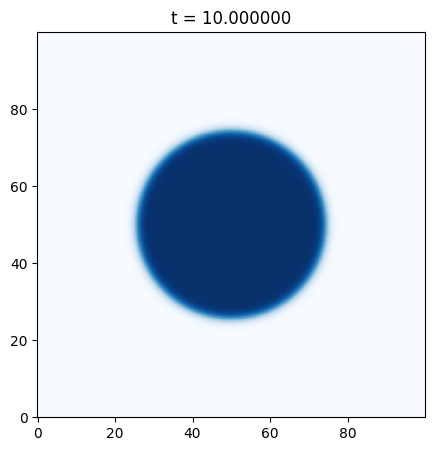

In [341]:
f = open("../state.dat", "r")
N = int(L/dx)
x = np.zeros(N)
y = np.zeros(N)
Z = np.zeros((N,N))
i = 0
for row in f:
    if i != 0:
        a, b, c = row.split(" ")
        #a, b = row.split("	")
        J = np.mod(i-1,N)
        I = int((i-1)/N)
        x[I] = float(a)
        y[J] = float(b)
        Z[I][J] = float(c)
    else:
        N, tmax, dx = row.split(" ")
        dx = float(dx)
        N = int(N)

    i = i + 1

#x = x[0:i-1]
#y = y[0:i-1]

# Make up some fake data
X,Y = np.meshgrid(x,y)

fig = plt.figure(figsize = (5,5))
fig.subplots_adjust(wspace=0.3)

# Blues
#plt.figure(figsize=(10,10))
plt.pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('Blues'), vmin=-1, vmax=1)
#plt.colorbar()
#plt.axis([-3, 3, -3, 3])
plt.title('t = ' + str(tmax))

In [342]:
i/N

1000.001

In [343]:
print(Z)

[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


In [344]:
ax.set_title(label)
ax.set_xlabel("space x")
ax.set_ylabel("u(x)")
eps = 0.5
#ax.set_ylim(-np.sqrt(float(Cave))-eps,np.sqrt(float(Cave))+eps)
#ax.set_xlim(5,95)

#ax.plot(np.linspace(0,100,5), np.zeros(5), linestyle = "dashed", color = "black")
#ax.set_axis_off()
fig
#plt.grid()

NameError: name 'label' is not defined

# Tail shape

In [ ]:
# Check kink's tail shape

#fig_, ax_ = plt.subplots()
ax_.set_xlabel("(x-xc)^2, x > xc")
ax_.set_ylabel("1-u(x,t)/beta(t)")
ax_.set_title("Tail of the kink @ t = "+str(state_time)+" and C(t) decaying\n x = xc: center of kink\n 1-u(x,t) approaches zero at the midpoint of the two kinks\n that is the end of the tail")

N = int(N)
beta = y[N-int(N/4)]
x2 = np.zeros(N)
for i in np.arange(0,N):
    x2[i] = np.sign(x[i]-x[int(N/2)])*(x[i]-x[int(N/2)])**2

curve_label = "t = " + str(state_time)
#curve_label = "NDSolve u_k ODE w/ critical velocity"
ax_.plot(x2[0:i-1], (np.ones(N-2)-y[0:i-1]/beta), label = curve_label)
ax_.set_yscale("log")

xc = 0
width = 3
plotlenght = 22

ax_.set_xlim((xc)**2,(xc+width+plotlenght)**2)
#ax_.legend(loc="bottom left")
#plt.ylim(10**(-3),10**(-1))
fig_

NameError: name 'ax_' is not defined

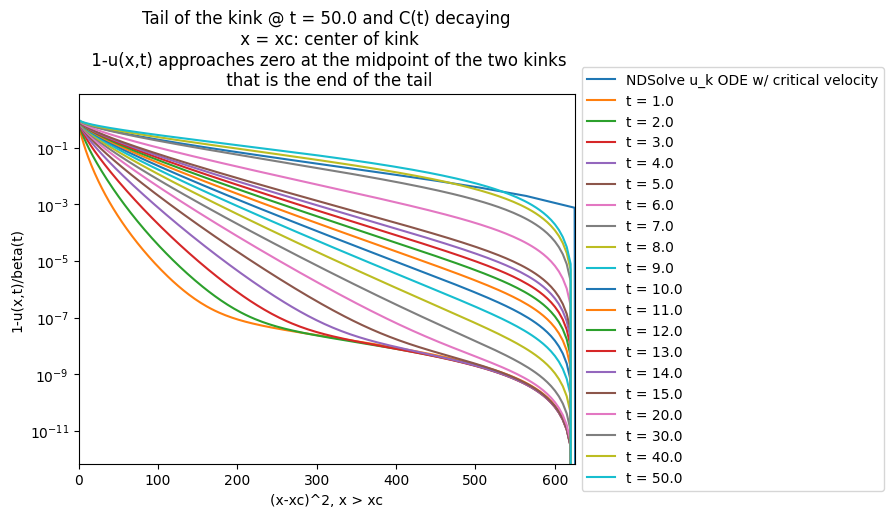

In [ ]:
ax_.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig_

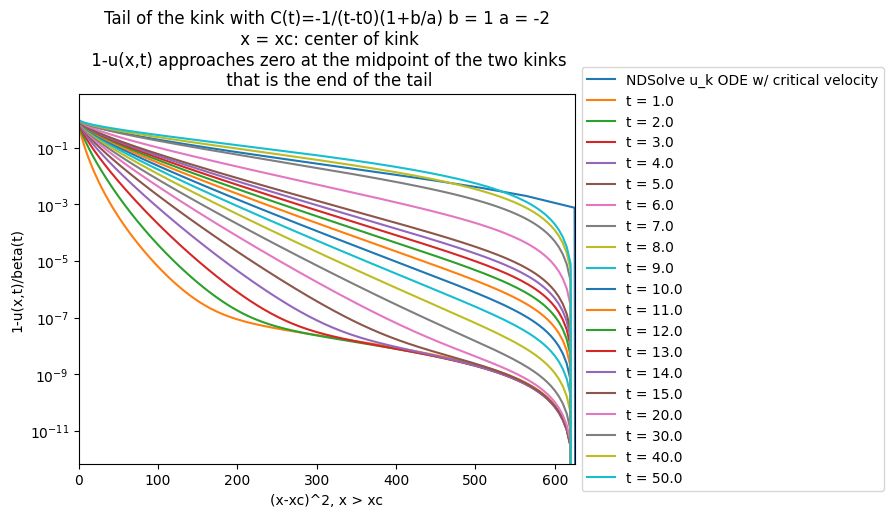

In [ ]:
ax_.set_title("Tail of the kink with C(t)=-1/(t-t0)(1+b/a) b = 1 a = -2\n x = xc: center of kink\n 1-u(x,t) approaches zero at the midpoint of the two kinks\n that is the end of the tail")
fig_

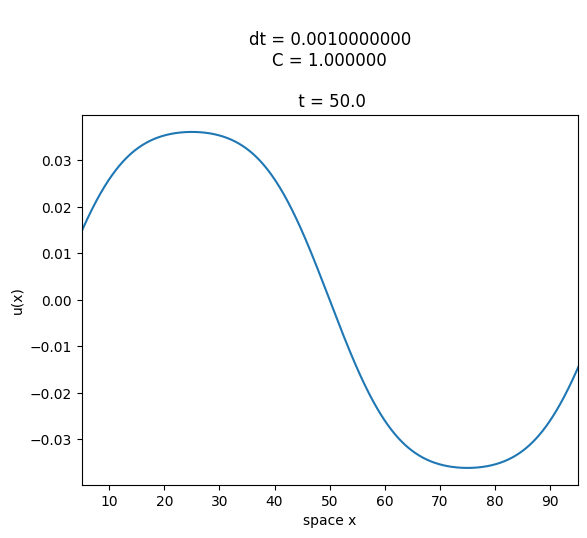

In [ ]:
fig